In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
theta = np.zeros(6)

In [14]:
df = pd.read_csv('titanic_data.csv')

In [128]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


In [126]:
df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0]/df[(df['Sex'] == 1)].shape[0]

0.7420382165605095

In [16]:
split_ratio = 0.9
num_samples = df.shape[0]
num_train = int(num_samples * split_ratio)
num_test = num_samples - num_train

In [17]:
y = df.iloc[:, 0].astype(np.int32).to_numpy()
Y_train, Y_test = y[:num_train], y[num_train:]

In [18]:
x = df.iloc[:, 1:7].astype(np.float64).to_numpy().T
X_train, X_test = x[:,:num_train], x[:,num_train:]

In [19]:
# x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
mean = X_train.mean(axis=1).reshape([6,1])
std = X_train.std(axis=1).reshape([6,1])
X_train, X_test = (X_train-mean)/std, (X_test-mean)/std

In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [21]:
def find_likelihood(theta, x, y):
    likelihood = 0
    for i in range(len(y)):
        if y[i] == 1:
            likelihood += np.log(sigmoid(np.matmul(theta, x[:,i])))
        else:
            likelihood += np.log(sigmoid(-np.matmul(theta, x[:,i])))
    return likelihood

In [38]:
alpha = 10**np.linspace(-4,-1,2000)
alpha

array([0.0001    , 0.00010035, 0.00010069, ..., 0.09931126, 0.09965504,
       0.1       ])

In [70]:
theta_list = []
likelihood_list = []
iter = 1000
# alpha = 10**np.linspace(-3,-1,500)
def train(x,y, theta, iter):
    for i in range(iter):
        y_hat = sigmoid(np.matmul(theta, x))
        # print(y_hat)
        grad = np.sum(x*(y-y_hat), axis=1)
        # grad_list.append(grad)
        # print(grad)
        alpha = 0.001 if i < 30 else 0.0001
        
        theta = theta + alpha*grad
        theta_list.append(theta)
        # print(theta)
        
        likelihood = find_likelihood(theta, x, y)
        likelihood_list.append(likelihood)

In [71]:
train(X_train, Y_train,theta, iter)

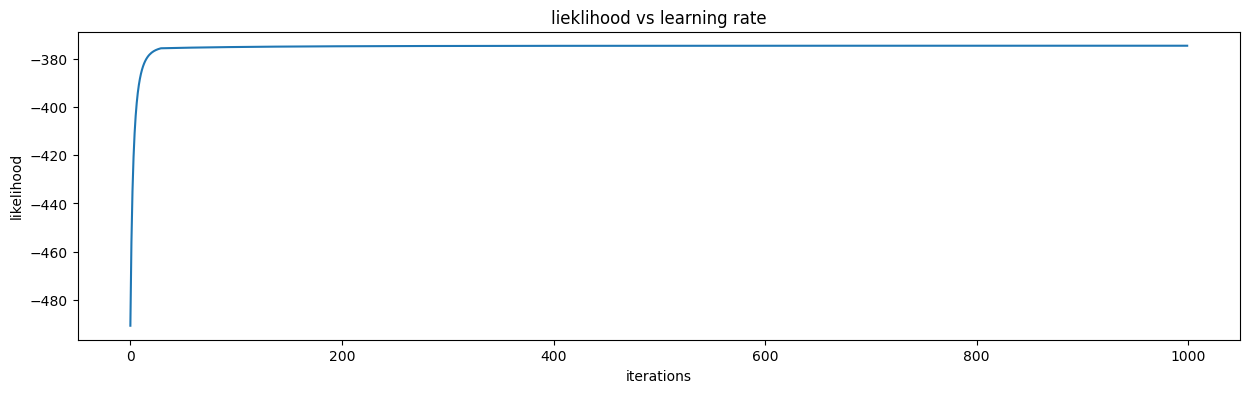

In [73]:

plt.figure(figsize=(15,4))
plt.xlabel('iterations')
plt.ylabel('likelihood')
plt.title('lieklihood vs learning rate')
plt.plot(likelihood_list)
plt.show()

In [90]:
def predict(x,y, theta):                                                                                                                                                                                                                                                                                                                                           
    y_hat = sigmoid(np.matmul(theta, x))
    y_pred = list(map(lambda l: 1 if l>=0.5 else 0, y_hat))
    print(y_pred)
    count = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            count += 1
    print('accuracy', count/len(y))
    return count/len(y)

In [91]:
predict(X_test, Y_test, theta_list[-1])

[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
accuracy 0.7752808988764045


0.7752808988764045

In [79]:
theta_star = theta_list[-1]

In [110]:
theta_star

array([-0.88150697,  1.35276923, -0.56007237, -0.37063885, -0.13861887,
        0.23049696])

In [101]:
#information matrix
def expo(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def information_matrix(x, theta):
    info = np.zeros((x.shape[0], x.shape[0]))
    for i in range(len(x)):
        info += expo(theta@x[:, i])*(x[:, i].reshape(-1, 1)@x[:, i].reshape(-1, 1).T)
    return info


In [102]:
infomat = information_matrix(X_train, theta_star)

In [106]:
infomat_inv = np.linalg.inv(infomat)

In [105]:
X_train[:, 0].reshape(-1, 1)@(X_train[:, 0].reshape(-1, 1).T)

array([[ 0.69947432, -0.62167514, -0.45399383,  0.37633168, -0.39206199,
        -0.41985647],
       [-0.62167514,  0.55252918,  0.40349827, -0.33447411,  0.34845481,
         0.37315785],
       [-0.45399383,  0.40349827,  0.29466471, -0.24425809,  0.25446785,
         0.27250786],
       [ 0.37633168, -0.33447411, -0.24425809,  0.20247425, -0.21093748,
        -0.22589149],
       [-0.39206199,  0.34845481,  0.25446785, -0.21093748,  0.21975446,
         0.23533353],
       [-0.41985647,  0.37315785,  0.27250786, -0.22589149,  0.23533353,
         0.25201706]])

In [ ]:
#section 3.4 significant features
cov_mat = [infomat_inv[i][i] for i in range(6)] 
theta_sq = theta_star**2
theta_sq/cov_mat

In [156]:
#section 3a
#own feature vector 
X_new = np.array([[2], [0], [25], [0], [0], [20]])
X_newnorm = (X_new-mean)/std
Y_new = sigmoid(theta_star@X_newnorm)
Y_new

array([0.5262661])

In [152]:
#section 3b 
std = np.sqrt(X_newnorm.T@infomat_inv@X_newnorm)


array([[9.25919659]])

In [153]:
(theta_star@X_newnorm)

array([-0.31540031])

In [157]:
1.96*9.25919659/800**0.5

0.6416295883185789

In [155]:
#log-odds interval
interval = np.array([-1, 0.4])
np.exp(interval)

array([0.36787944, 1.4918247 ])